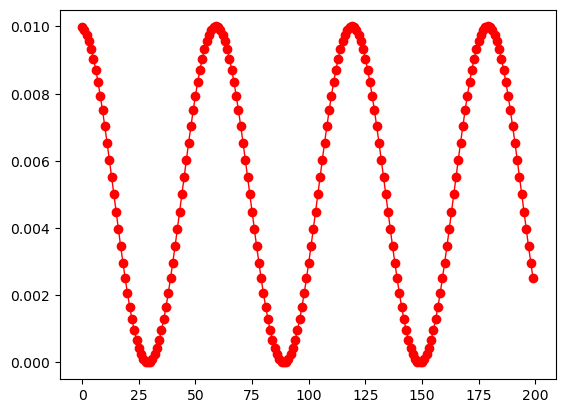

In [1]:
from torchvision.models import resnet50
import torch.optim as optim
from matplotlib import pyplot as plt
model=resnet50(weights=None)

optimizer=optim.SGD(model.parameters(), lr=0.01, momentum=0.9 )
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=30)

x=[]
y=[]
for i in range(200):
    optimizer.step()
    scheduler.step()
    last_lr=scheduler.get_last_lr()[0]
    x.append(i)
    y.append(last_lr)
plt.plot(x,y,linewidth=1,color="red", marker="o")
plt.show()